In [77]:
import numpy as np
import skimage as ski
from skimage import io, transform,draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(12,9)
import os
import copy
from IPython.display import clear_output
import compression as comp

#run these if you want to reload imported modules every time the code is run 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
##### make a bunch of blank 250x250 images with black dots in them for testing and training the neural network 
N = 100 # length of compressed projective representation 
d = 150 #dimension of image 
M = int(round(np.sqrt(2*d**2)))# length of uncompressed projective representation
L = 5 # number of projective representations  MUST BE ODD 

if not os.path.isdir('../data'):
    os.mkdir('../data')
if not os.path.isdir('../data/training'):
    os.mkdir('../data/training')
if not os.path.isdir('../data/testing'):
    os.mkdir('../data/testing')
    
S = comp.sensing_matrix(N,M) 
np.save('../data/sensing_matrix.npy',S)

for i in range(1000):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('../data/training/train-uncomp-%04d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('../data/training/train-%04d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('../data/training/train-comp-%04d.npy'%i,Y)  
    
for i in range(100):

    points = np.random.randint(0,d,(np.random.randint(0,20),2))
    np.save('../data/testing/test-uncomp-%04d.npy'%i,points)

    im = np.zeros((d,d),dtype=float)    
    for p in points:
        im[ski.draw.circle(*p,3,shape=im.shape)] = 1.0
    ski.io.imsave('../data/testing/test-%04d.jpg'%i,im)
    
    F = comp.project(points,shape=(d,d),L=L,M=M)
    Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix
    np.save('../data/testing/test-comp-%04d.npy'%i,Y)      


/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0004.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0010.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0011.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0012.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0155.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0156.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0158.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0159.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0160.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0320.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0322.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0325.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0328.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0329.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0481.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0482.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0483.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0484.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0486.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0647.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0648.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0649.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0652.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0654.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0732.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0733.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0737.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0738.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0739.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0889.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0891.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0892.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0894.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/training/train-0895.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/ski

/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/testing/test-0043.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/testing/test-0044.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/testing/test-0046.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/testing/test-0047.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../data/testing/test-0048.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kpierce/anaconda3/lib/python3.6/site-packages/skimage/io/_i

In [79]:
# check that the data encode the positions of the points in the compressed representation 

def check_comp_vs_uncomp(n):
    """ the compressed->uncompressed points are blue plusses
    ground truth is pink circles"""
    im = ski.io.imread('../data/training/train-%04d.jpg'%n)
    pts_u = np.load('../data/training/train-uncomp-%04d.npy'%n)
    pts_c = np.load('../data/training/train-comp-%04d.npy'%n)
    pts_u_ = comp.decompress(pts_c,S,im.shape,L,M)
    im = np.stack((im,)*3,-1)
    for p in pts_u:
        r,c = ski.draw.circle_perimeter(p[0],p[1],5,shape = im.shape)
        im[r,c]=[255,0,255]
    for p in pts_u_:
        im = comp.draw_plus(p,im,col=[0,0,255])
    plt.imshow(im)

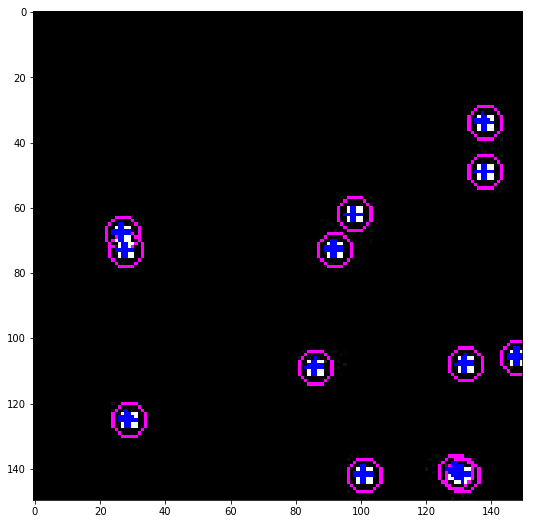

In [80]:
check_comp_vs_uncomp(413)

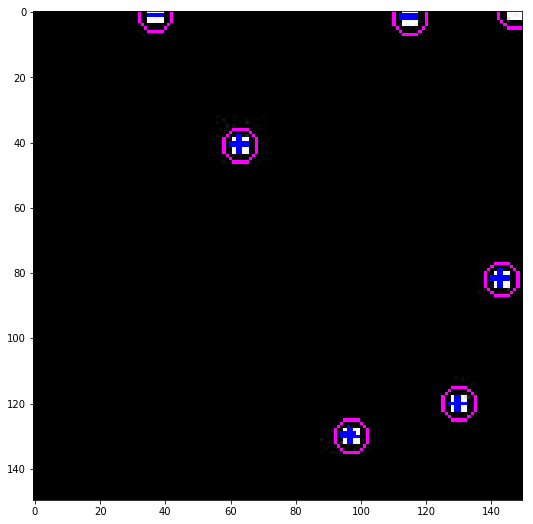

In [81]:
check_comp_vs_uncomp(13)

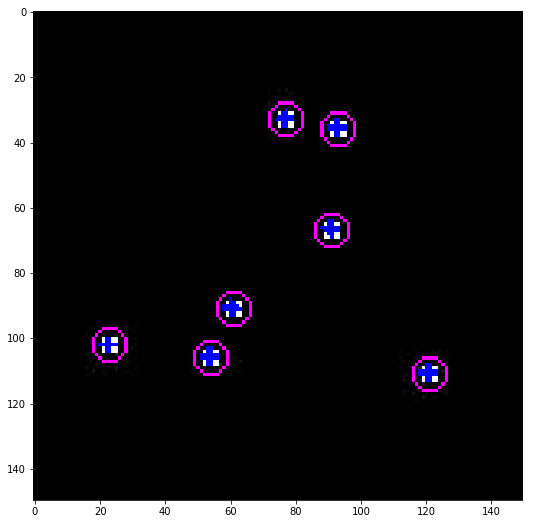

In [82]:
check_comp_vs_uncomp(17)

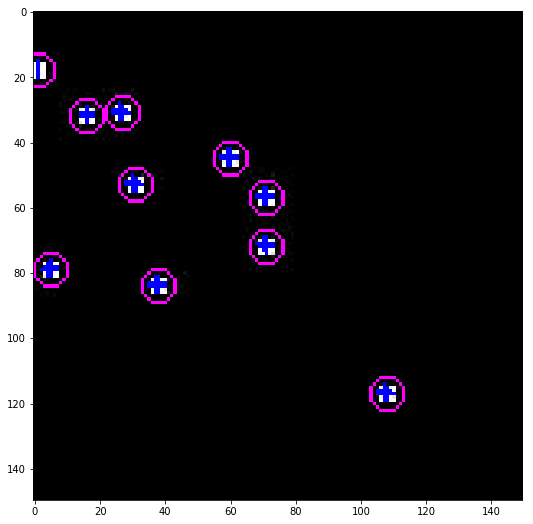

In [83]:
check_comp_vs_uncomp(99)